In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import math

datos = pd.read_csv('delivery_dataset.csv',sep=';')
datos = datos.replace('NA',np.nan)

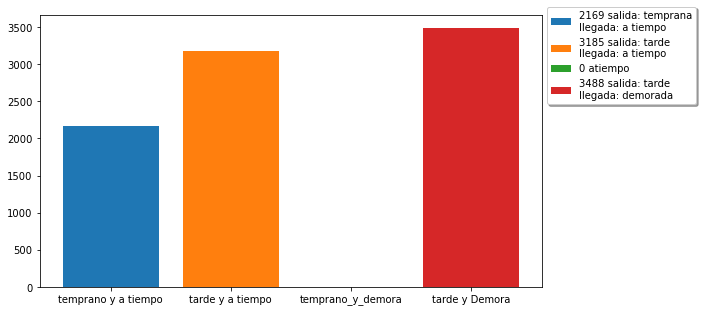

In [104]:
def tarde_y_demora(ano, mes, datos):
    carga_mensual = datos[datos.Year == ano]
    carga_mensual = carga_mensual[carga_mensual.Month == mes]
    # plt.subplots(figsize=(15, 7))
    try:
        plt.bar('tarde y Demora', carga_mensual['tarde_y_demora'][carga_mensual.tarde_y_demora == 1].value_counts(),
                width=0.8,
                label=str(carga_mensual['tarde_y_demora'][carga_mensual.tarde_y_demora == 1].value_counts()[
                              1]) + ' salida: tarde\nllegada: demorada',
                align='center')
        plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.05), shadow=True)

    except:
        plt.bar('tarde y Demora', 0,
                width=0.8,
                label=str(0) + ' salida: tarde\nllegada: demorada',
                align='center')
        plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.05), shadow=True)


def tarde_y_atiempo(ano, mes, datos):
    carga_mensual = datos[datos.Year == ano]
    carga_mensual = carga_mensual[carga_mensual.Month == mes]
    # plt.subplots(figsize=(15, 7))
    try:
        plt.bar('tarde y a tiempo', carga_mensual['tarde_y_atiempo'][carga_mensual.tarde_y_atiempo == 1].value_counts(),
                width=0.8,
                label=str(
                    carga_mensual['tarde_y_atiempo'][carga_mensual.tarde_y_atiempo == 1].value_counts()[
                        1]) + ' salida: tarde\nllegada: a tiempo',
                align='center')
        plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.05), shadow=True)
    except:
        plt.bar('tarde y a tiempo', 0,
                width=0.8,
                label=str(
                    0) + ' salida: tarde\nllegada: a tiempo',
                align='center')
        plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.05), shadow=True)



def temprano_y_atiempo(ano, mes, datos):
    carga_mensual = datos[datos.Year == ano]
    carga_mensual = carga_mensual[carga_mensual.Month == mes]
    plt.subplots(figsize=(9,5))
    try:
        plt.bar('temprano y a tiempo',
                carga_mensual['temprano_y_atiempo'][carga_mensual.temprano_y_atiempo == 1].value_counts(),
                width=0.8,
                label=str(
                    carga_mensual['temprano_y_atiempo'][carga_mensual.temprano_y_atiempo == 1].value_counts()[
                        1]) + ' salida: temprana\nllegada: a tiempo',
                align='center')
        plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.05), shadow=True)
    except:
        plt.bar('temprano y a tiempo',
                0,
                width=0.8,
                label=str(
                    0) + ' salida: temprana\nllegada: a tiempo',
                align='center')
        plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.05), shadow=True)


def temprano_y_demora(ano, mes, datos):
    carga_mensual = datos[datos.Year == ano]
    carga_mensual = carga_mensual[carga_mensual.Month == mes]
    # plt.subplots(figsize=(15, 7))
    try:
        plt.bar('temprano_y_demora',
                carga_mensual['temprano_y_demora'][carga_mensual.temprano_y_demora == 1].value_counts(),
                width=0.8,
                label=str(
                    carga_mensual['temprano_y_demora'][carga_mensual.temprano_y_demora == 1].value_counts()[
                        1]) + ' atiempo',
                align='center')
        plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.05), shadow=True)
    except:
        plt.bar('temprano_y_demora',
                0,
                width=0.8,
                label=str(
                    0) + ' atiempo',
                align='center')
        plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.05), shadow=True)
def tarde_demora(a, b):
    return 1 if a > 0 and b == 1 else 0


def temprano_demora(a, b):
    return 1 if a <= 0 and b == 1 else 0


def tarde_atiempo(a, b):
    return 1 if a > 0 and b == 0 else 0


def temprano_atiempo(a, b):
    return 1 if a <= 0 and b == 0 else 0

def grafica(ano,mes,datos):
    datos['tarde_y_demora'] = datos.apply(lambda x: tarde_demora(x['Shipment_Delay'], x['Delivery_Status']),
                                                          axis=1)
    datos['temprano_y_demora'] = datos.apply(
        lambda x: temprano_demora(x['Shipment_Delay'], x['Delivery_Status']), axis=1)
    datos['tarde_y_atiempo'] = datos.apply(
        lambda x: tarde_atiempo(x['Shipment_Delay'], x['Delivery_Status']), axis=1)
    datos['temprano_y_atiempo'] = datos.apply(
        lambda x: temprano_atiempo(x['Shipment_Delay'], x['Delivery_Status']), axis=1)

    temprano_y_atiempo(ano,mes,datos)
    tarde_y_atiempo(ano,mes,datos)
    temprano_y_demora(ano,mes,datos)
    tarde_y_demora(ano,mes,datos)
    plt.savefig('relacion_salida_llegada.png')
    
grafica(2020,1,datos)

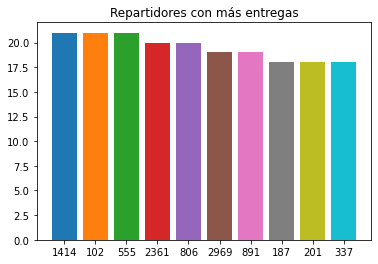

In [95]:
def mayor_entregas(ano, mes, datos):
    carga_mensual = datos[datos.Year == ano][datos.Month == mes]
    try:
        for i, v in enumerate(carga_mensual['Carrier_Num'].value_counts().head(10).index.tolist()):
            plt.bar(str(v), carga_mensual['Carrier_Num'].value_counts()[v], width=0.8)
        plt.title("Repartidores con más entregas")
    except:
        plt.bar(0, 0, width=0.8)
    plt.savefig('mayor-entregas.png')
def mayor_repartidor(ano, mes, datos):
    return int(datos['Carrier_Num'].max())

def menor_repartidor(ano, mes, datos):
    return int(datos['Carrier_Num'].min())

mayor_entregas(2020,1,datos)

#mayor_repartidor(2020,1,datos)

#menor_repartidor(2020,1,datos)

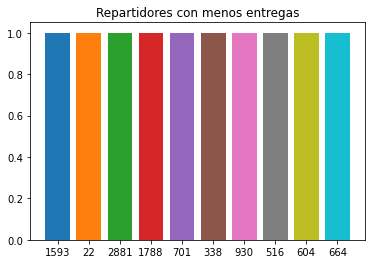

In [96]:
def menor_entregas(ano, mes, datos):
    carga_mensual = datos[datos.Year == ano][datos.Month == mes]
    try:
        for i, v in enumerate(carga_mensual['Carrier_Num'].value_counts().tail(10).index.tolist()):
            plt.bar(str(v), carga_mensual['Carrier_Num'].value_counts()[v], width=0.8,)
        plt.title("Repartidores con menos entregas")
    except:
        plt.bar(0,0, width=0.8)
    plt.savefig('menor-entregas.png')
menor_entregas(2020,1,datos)

508

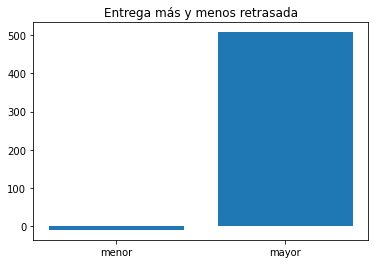

In [91]:
def min_max_delay(ano, mes, datos):
    datos = [int(datos[datos.Year == ano][datos.Month == mes]['Shipment_Delay'].min()),int(datos[datos.Year == ano][datos.Month == mes]['Shipment_Delay'].max())]
    plt.bar(['menor','mayor'],datos,align='center')
    plt.title('Entrega más y menos retrasada')
    plt.savefig('min-max-delay.png')
    
def min_delay(ano, mes, datos):
    return int(datos[datos.Year == ano][datos.Month == mes]['Shipment_Delay'].min())

def max_delay(ano, mes, datos):
    return int(datos[datos.Year == ano][datos.Month == mes]['Shipment_Delay'].max())
    

min_max_delay(2020,1,datos)

min_delay(2020,1,datos)

max_delay(2020,1,datos)

3488

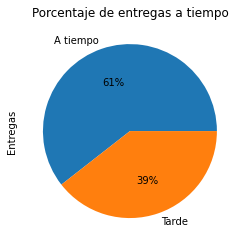

In [73]:
def entregas_a_tiempo_mes(year,month,datos):
    try:
        on_time = datos[datos.Year==year][datos.Month==month]['Delivery_Status'].dropna().value_counts()
        on_time.plot(kind='pie',title='Porcentaje de entregas a tiempo',labels=['A tiempo','Tarde'],ylabel='Entregas',autopct='%1.0f%%',)
        plt.savefig('primera.png')
    except:
        plt.plot(kind='pie',title='Porcentaje de entregas a tiempo',labels=['A tiempo','Tarde'],ylabel='Entregas',autopct='%1.0f%%',)
        plt.savefig('primera.png')

def cant_entregas_a_tiempo_mes(year,month,datos):
    try:
        return int(datos[datos.Year==year][datos.Month==month][datos.Delivery_Status == 0]['Delivery_Status'].dropna().value_counts())
    except:
        return int(0)
        
def cant_entregas_tarde_mes(year,month,datos):
    try:
        return int(datos[datos.Year==year][datos.Month==month][datos.Delivery_Status == 1]['Delivery_Status'].dropna().value_counts())
    except:
        return int(0)
    
entregas_a_tiempo_mes(2020,1,datos)

cant_entregas_a_tiempo_mes(2020,1,datos)

cant_entregas_tarde_mes(2020,1,datos)

In [74]:
def demoras(year,month,datos):
    try:
        Shipment_Delay = datos[datos.Year==year][datos.Month==month]['Shipment_Delay'].dropna().value_counts()
        Shipment_Delay=pd.DataFrame(data=[Shipment_Delay[Shipment_Delay.index<0].sum(),Shipment_Delay.loc[(Shipment_Delay.index>=0) & (Shipment_Delay.index<=60)].sum(),Shipment_Delay.loc[(Shipment_Delay.index>=60) & (Shipment_Delay.index<=180)].sum(),Shipment_Delay[Shipment_Delay.index>180].sum()], index=['Temprano','Menos de 1 hora','1 a 3 horas','Más de 3 horas'])
        Shipment_Delay.plot(kind='bar',title='Cantidad de entregas por tiempo de demora',rot=0, legend=None)
        plt.savefig('segunda.png')
    except:
        plt.plot(kind='pie',title='Porcentaje de entregas a tiempo',labels=['A tiempo','Tarde'],ylabel='Entregas',autopct='%1.0f%%',)
        plt.savefig('primera.png')
    
def shipment_temprano(year,month,datos):
    Shipment_Delay = datos[datos.Year==year][datos.Month==month]['Shipment_Delay'].dropna().value_counts()
    return Shipment_Delay[Shipment_Delay.index<0].sum()

def shipment_menos_1_hora(year,month,datos):
    Shipment_Delay = datos[datos.Year==year][datos.Month==month]['Shipment_Delay'].dropna().value_counts()
    return Shipment_Delay.loc[(Shipment_Delay.index>=0) & (Shipment_Delay.index<=60)].sum()

def shipment_1_a_3_horas(year,month,datos):
    Shipment_Delay = datos[datos.Year==year][datos.Month==month]['Shipment_Delay'].dropna().value_counts()
    return Shipment_Delay.loc[(Shipment_Delay.index>=60) & (Shipment_Delay.index<=180)].sum()

def shipment_mas_3_horas(year,month,datos):
    Shipment_Delay = datos[datos.Year==year][datos.Month==month]['Shipment_Delay'].dropna().value_counts()
    return Shipment_Delay[Shipment_Delay.index>180].sum()
    
#demoras(2020,1,datos)

#shipment_temprano(2020,1,datos)

#shipment_menos_1_hora(2020,1,datos)

#shipment_1_a_3_horas(2020,1,datos)

#shipment_mas_3_horas(2020,1,datos)

6

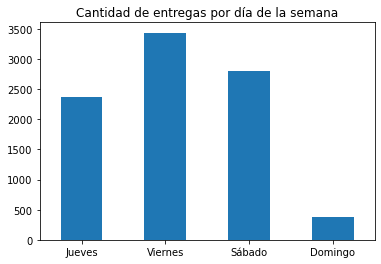

In [75]:
def entregas_por_dia_semana(year,month,datos):
    try:
        DayOfWeek = datos[datos.Year==year][datos.Month==month]['DayOfWeek'].value_counts().sort_index()
        indices = DayOfWeek.index.tolist()
        diassemana = ['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']
        indices = [diassemana[i-1] for i in indices]
        DayOfWeek.index = indices
        DayOfWeek.plot(kind='bar',title='Cantidad de entregas por día de la semana',rot=0, legend=None)
        plt.savefig('tercera.png')
    except:
        plt.plot(kind='bar',title='Cantidad de entregas por día de la semana',rot=0, legend=None)
        plt.savefig('tercera.png')
    
def dia_mas_entregas(year,month,datos):
    return datos['DayofMonth'].value_counts().idxmax()

def dia_menos_entregas(year,month,datos):
    return datos['DayofMonth'].value_counts().idxmin()

entregas_por_dia_semana(2020,1,datos)

dia_mas_entregas(2020,1,datos)

dia_menos_entregas(2020,1,datos)

In [13]:
def demora_promedio(year,month,datos):
    return datos['Shipment_Delay'].mean()

def distancia_prom(year,month,datos):
    return datos['Distance'].mean()

def distancia_max(year,month,datos):
    return datos['Distance'].max()

def distancia_min(year,month,datos):
    return datos['Distance'].min()

demora_promedio(2020,1,datos)

distancia_prom(2020,1,datos)

distancia_max(2020,1,datos)

distancia_min(2020,1,datos)

133

In [14]:
def source_mayor(year,month,datos):
    return datos['Source'].value_counts().nlargest(n=5)

def source_menor(year,month,datos):
    return datos['Source'].value_counts().nsmallest(n=5)
   
def destino_mayor(year,month,datos):
    return datos['Destination'].value_counts().nlargest(n=5)

def destino_menor(year,month,datos):
    return datos['Destination'].value_counts().nsmallest(n=5)

destino_mayor(2020,1,datos)

#destino_menor(2020,1,datos)
    
#source_mayor(2020,1,datos)

#source_menor(2020,1,datos)

LAS    665
MDW    585
PHX    540
BWI    459
OAK    393
Name: Destination, dtype: int64

In [15]:
def cant_paquetes_dia_de_semana(year,month,day,datos):
    return datos[datos.DayOfWeek == day]['DayOfWeek'].sum()

cant_paquetes_dia_de_semana(2020,1,3,datos)

0

In [16]:
datos['Carrier_Num'].value_counts().nlargest(n=5)
#datos['Carrier_Num'].value_counts().nsmallest(n=100)

1414    21
102     21
555     21
2361    20
806     20
Name: Carrier_Num, dtype: int64

In [17]:
def cant_entregas(year,month,datos):
    return datos.shape[0]

def cant_distancia(year,month,datos):
    return datos['Distance'].sum()

cant_distancia(2020,1,datos)

cant_entregas(2020,1,datos)

8999

In [105]:
import re
import webbrowser
import os
import imgkit
def crear_reporte(year,month,datos):
    #Crear graficas y todos los datos
    entregas_a_tiempo_mes(year,month,datos)
    plt.close() 
    demoras(year,month,datos)
    plt.close()  
    entregas_por_dia_semana(year,month,datos)
    plt.close()  
    grafica(year,month,datos)
    plt.close()  
    mayor_entregas(year,month,datos)
    plt.close()  
    menor_entregas(year,month,datos)
    plt.close() 
    min_max_delay(year,month,datos)
    plt.close() 
    
    
    
    
    #generar reporte
    with open('Formato.html', 'r') as form:
        html = form.read()
    #se reemplazan todos los datos del html con los valores calculados
    meses = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
    #titulo
    html = re.sub('%mes%',meses[month-1],html)
    #parrafo arriba
    html = re.sub('%cantentregas%',f'{cant_entregas(year,month,datos)}',html)
    html = re.sub('%cantmillas%',f'{cant_distancia(year,month,datos)}',html)
    html = re.sub('%mesatiempo%',f'{cant_entregas_a_tiempo_mes(year,month,datos)}',html)
    html = re.sub('%mestarde%',f'{cant_entregas_tarde_mes(year,month,datos)}',html)
    
    html = re.sub('%maslargo%',f'{distancia_max(year,month,datos)}',html)
    html = re.sub('%mascorto%',f'{distancia_min(year,month,datos)}',html)
    
    html = re.sub('%cantentregastemp1%',f'{shipment_temprano(year,month,datos)}',html)
    html = re.sub('%cantentregastemp2%',f'{shipment_menos_1_hora(year,month,datos)}',html)
    html = re.sub('%cantentregastemp3%',f'{shipment_1_a_3_horas(year,month,datos)}',html)
    html = re.sub('%cantentregastemp4%',f'{shipment_mas_3_horas(year,month,datos)}',html)
    
    #min-max-delay
    if min_delay(year,month,datos) < 0:
        html = re.sub('%mindelay%',f'se adelanto {-min_delay(year,month,datos)}',html)
    else:
        html = re.sub('%mindelay%',f'se tardo {min_delay(year,month,datos)}',html)
    html = re.sub('%maxdelay%',f'se tardo {max_delay(year,month,datos)}',html)
    
    html = re.sub('%repartmax%',f'{mayor_repartidor(year,month,datos)}',html)
    if menor_repartidor(year,month,datos) < 1 or menor_repartidor(year,month,datos) > 1:
        html = re.sub('%repartmin%',f'{menor_repartidor(year,month,datos)} entregas',html)
    elif menor_repartidor(year,month,datos) == 1:
        html = re.sub('%repartmin%',f'{menor_repartidor(year,month,datos)} entrega',html)
    
    #Datos Generales
    html = re.sub('%valor1%',f'{demora_promedio(year,month,datos):.1f} minutos',html)
    html = re.sub('%valor2%',f'{distancia_prom(year,month,datos):.1f} millas',html)
    html = re.sub('%valor3%',f'{dia_mas_entregas(year,month,datos)}',html)
    html = re.sub('%valor4%',f'{dia_menos_entregas(year,month,datos)}',html)
    
    #por dia
    for i in range(1,8):
        html = re.sub(f'%cantdia{i}%',f'{cant_paquetes_dia_de_semana(2020,1,i,datos)}',html)    
    
    #sources mas populares
    pandatemp = source_mayor(2020,1,datos)
    for i in range(0,5):
        html = re.sub(f'%ciudad{i+1}%',f'{pandatemp.index[i]}',html)
        html = re.sub(f'%ciudad{i+1}cant%',f'{pandatemp[i]}',html)
        
    #sources menos populares
    pandatemp = source_menor(2020,1,datos)
    for i in range(0,5):
        html = re.sub(f'%ciudad{i+6}%',f'{pandatemp.index[i]}',html)
        html = re.sub(f'%ciudad{i+6}cant%',f'{pandatemp[i]}',html)
        
    #destinos mas populares
    pandatemp = destino_mayor(2020,1,datos)
    for i in range(0,5):
        html = re.sub(f'%ciudad{i+11}%',f'{pandatemp.index[i]}',html)
        html = re.sub(f'%ciudad{i+11}cant%',f'{pandatemp[i]}',html)
    
    #destinos menos populares
    pandatemp = destino_menor(2020,1,datos)
    for i in range(0,5):
        html = re.sub(f'%ciudad{i+16}%',f'{pandatemp.index[i]}',html)
        html = re.sub(f'%ciudad{i+16}cant%',f'{pandatemp[i]}',html)
    #Se guarda en el archivo a mostrar
    temp = open('temp.html', 'w')
    temp.write(html)
    temp.close()
    #Se abre el reporte
    archivo = 'file:///'+os.path.realpath('temp.html')
    webbrowser.open_new_tab(archivo)
crear_reporte(2020,1,datos)

In [106]:
#se requiere instalar imgkit y wkthmltopdf
import imgkit



def crear_reporte_imagen(year,month,datos):
    crear_reporte(year,month,datos)
    
    path_wkthmltoimage = r'C:\Program Files\wkhtmltopdf\bin\wkhtmltoimage.exe'
    config = imgkit.config(wkhtmltoimage=path_wkthmltoimage)
    
    kitoptions = {
        "enable-local-file-access": None
    }
    css = 'style.css'
    imgkit.from_file('temp.html', 'out.jpg',config=config,options=kitoptions,css=css)
    
crear_reporte_imagen(2020,1,datos)

Loading page (1/2)
QNetworkAccessFileBackendFactory: URL has no schema set, use file:// for files
QNetworkAccessFileBackendFactory: URL has no schema set, use file:// for files
QNetworkAccessFileBackendFactory: URL has no schema set, use file:// for files
QNetworkAccessFileBackendFactory: URL has no schema set, use file:// for files
QNetworkAccessFileBackendFactory: URL has no schema set, use file:// for files
QNetworkAccessFileBackendFactory: URL has no schema set, use file:// for files
QNetworkAccessFileBackendFactory: URL has no schema set, use file:// for files
QNetworkAccessFileBackendFactory: URL has no schema set, use file:// for files
Rendering (2/2)                                                    
Done                                                               


In [ ]:
#integracion con discord
import discord
import nest_asyncio
import re
nest_asyncio.apply()

token = 'UPicmiKg3LNuBzKQ474aCTDPLUXdb1U3fLGlch.3lYHyG.AO2ETN5MDN0YDMycDOwYzM2ATM'

intents = discord.Intents.all()
client = discord.Client(command_prefix='!', intents=intents)

@client.event
async def on_ready():
    print('Ingresando como {0.user}'.format(client))
 
@client.event
async def on_message(message):
    print("mensaje-->", message.content)
    if message.author == client.user:
        return
    
    if message.content.startswith('$reporte'):
        crear_reporte_imagen(2020,1,datos)
        await message.channel.send(file=discord.File('out.jpg'))
 
client.run(token[::-1])

[2023-01-24 18:00:49] [INFO    ] discord.client: logging in using static token
[2023-01-24 18:00:49] [INFO    ] discord.client: logging in using static token
[2023-01-24 18:00:49] [INFO    ] discord.client: logging in using static token
[2023-01-24 18:00:49] [INFO    ] discord.gateway: Shard ID None has connected to Gateway (Session ID: 00e0793ceebabda0ec5bad0ce9b0895e).
[2023-01-24 18:00:49] [INFO    ] discord.gateway: Shard ID None has connected to Gateway (Session ID: 00e0793ceebabda0ec5bad0ce9b0895e).
[2023-01-24 18:00:49] [INFO    ] discord.gateway: Shard ID None has connected to Gateway (Session ID: 00e0793ceebabda0ec5bad0ce9b0895e).


Ingresando como Chatbot#8513
mensaje--> $reporte
Loading page (1/2)
QNetworkAccessFileBackendFactory: URL has no schema set, use file:// for files
QNetworkAccessFileBackendFactory: URL has no schema set, use file:// for files
QNetworkAccessFileBackendFactory: URL has no schema set, use file:// for files
QNetworkAccessFileBackendFactory: URL has no schema set, use file:// for files
QNetworkAccessFileBackendFactory: URL has no schema set, use file:// for files
QNetworkAccessFileBackendFactory: URL has no schema set, use file:// for files
QNetworkAccessFileBackendFactory: URL has no schema set, use file:// for files
QNetworkAccessFileBackendFactory: URL has no schema set, use file:// for files
Rendering (2/2)                                                    
Done                                                               
mensaje--> 
